# Import Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
raw_df = pd.read_csv(r"C:\Users\josia\Desktop\Deep Learning Capstone\insurance.csv")

# Data Wrangling

Check out dataframe

In [3]:
print(raw_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Check for null values

In [4]:
raw_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values

Check for duplicates

In [7]:
dup = raw_df[raw_df.duplicated(keep=False)]

In [8]:
print(dup)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


Drop duplicate and reset index

In [10]:
raw_df = raw_df.drop_duplicates(keep='first')

In [11]:
raw_df = raw_df.reset_index(drop=True)

Confirm dropped duplicate and index reset

In [12]:
print(raw_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1332   50    male  30.970         3     no  northwest  10600.54830
1333   18  female  31.920         0     no  northeast   2205.98080
1334   18  female  36.850         0     no  southeast   1629.83350
1335   21  female  25.800         0     no  southwest   2007.94500
1336   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


Statistical Measures

In [13]:
raw_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
raw_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Convert object data types to boolean by getting dummies

In [15]:
model_df = pd.get_dummies(raw_df, columns=['sex', 'smoker', 'region'], drop_first = True)

In [16]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Scale numeric columns in preparation for machine learning

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_df[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(model_df[['age', 'bmi', 'children', 'charges']])

In [18]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,False,True,False,False,True
1,-1.511647,0.509422,-0.079442,-0.954381,True,False,False,True,False
2,-0.799350,0.383155,1.580143,-0.729373,True,False,False,True,False
3,-0.443201,-1.305052,-0.909234,0.719104,True,False,True,False,False
4,-0.514431,-0.292456,-0.909234,-0.777499,True,False,True,False,False


In [19]:
model_df.dtypes

age                 float64
bmi                 float64
children            float64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

Convert booleans to integers

In [20]:
model_df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']] = model_df[['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']].astype(int)

In [21]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,-0.954381,1,0,0,1,0
2,-0.799350,0.383155,1.580143,-0.729373,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,0.719104,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,-0.777499,1,0,1,0,0


# Exploratory Data Analysis

<Axes: >

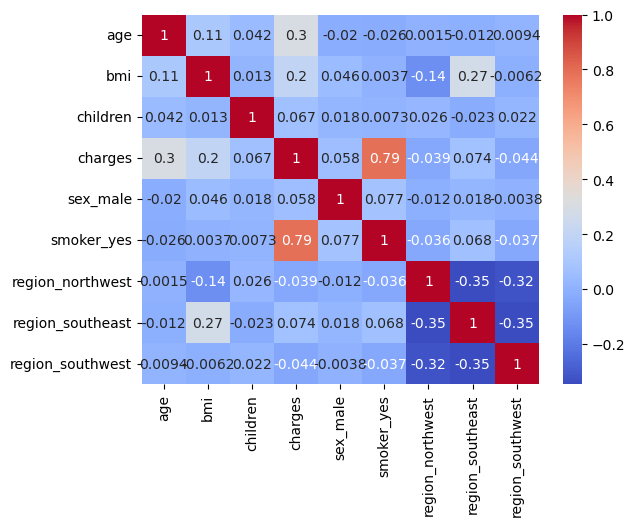

In [40]:
#correlational heatmap
corr = model_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

It appears that the top three strongest correlators with charges are smoking, age, and bmi

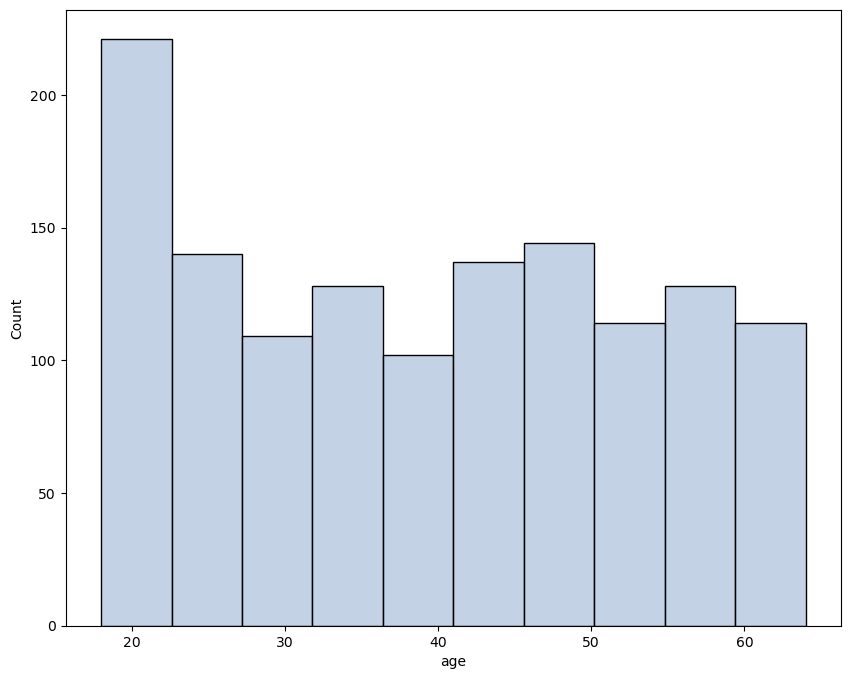

In [22]:
#distribution of age
plt.figure(figsize=(10, 8))
sns.histplot(raw_df['age'], bins=10, color='lightsteelblue')
plt.show()

It appears that age is relatively evenly distributed in this dataframe. However, there is a larger number of young individuals sampled around age 20 than in other age groups

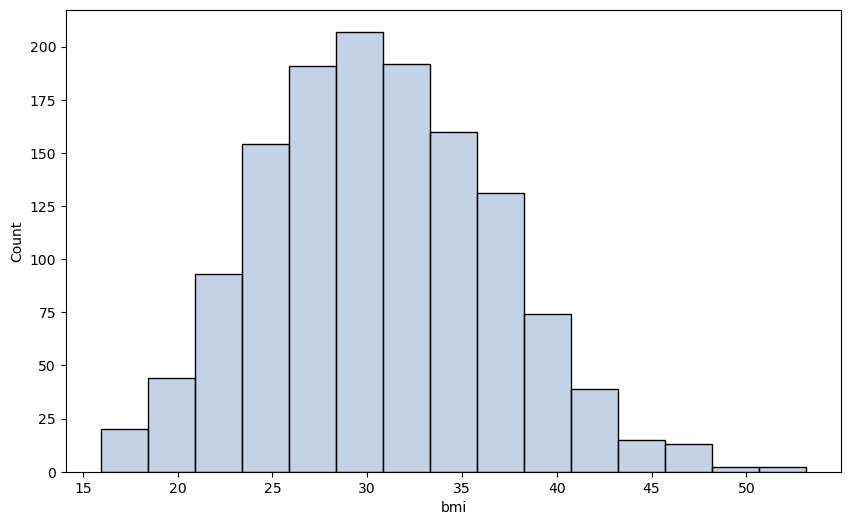

In [57]:
#distribution of bmi
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['bmi'], bins=15, color='lightsteelblue')
plt.show()

It appears that bmi in our dataset has a normal distribution

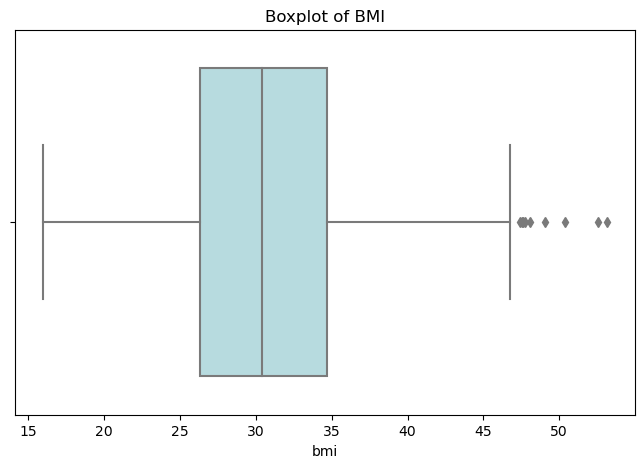

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=raw_df['bmi'], color = 'powderblue')
plt.title(f'Boxplot of BMI')
plt.show()

This distribution does have a few outliers with respect to bmi

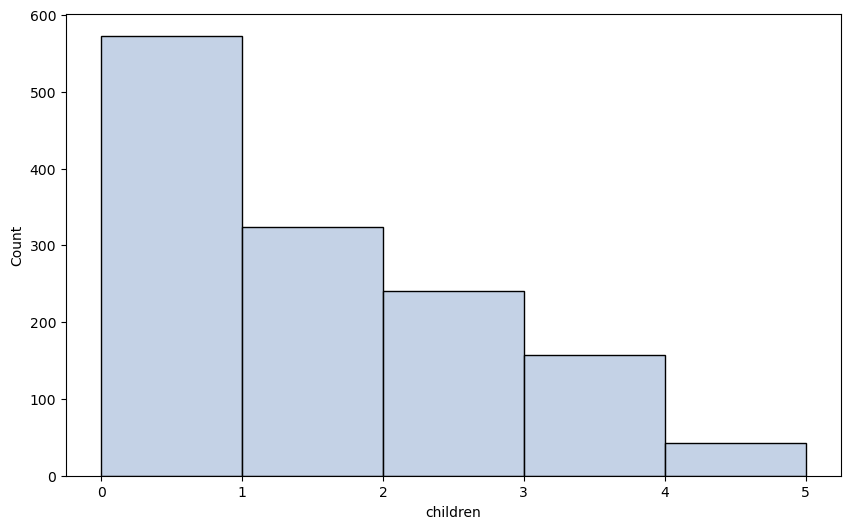

In [26]:
#distribution of no. of children
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['children'], bins=5, color='lightsteelblue')
plt.show()

It appears that there is a positively skewed distribution with respect to the number of children, which the majority of indivudals having none to fewer children

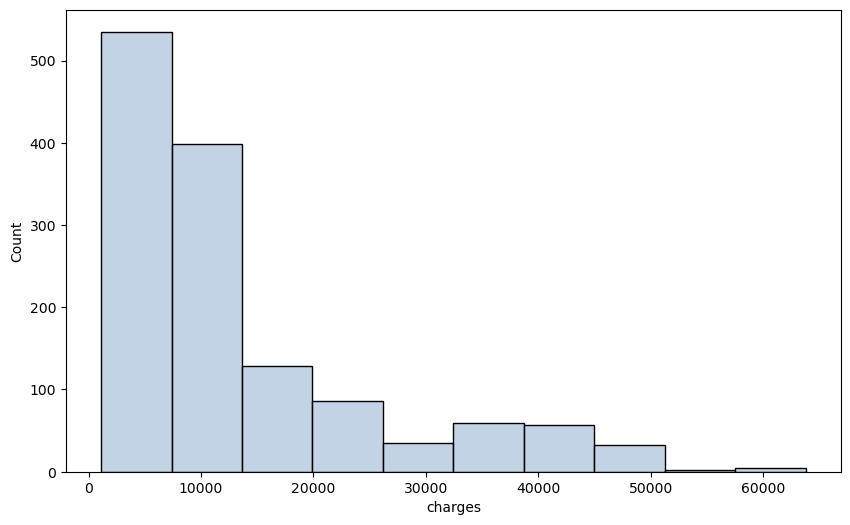

In [27]:
#distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['charges'], bins=10, color='lightsteelblue')
plt.show()

It appears that charges also follow a positively skewed distribution; however, it is possible that there is some slight bimodalitiy in the data

<Axes: xlabel='region', ylabel='charges'>

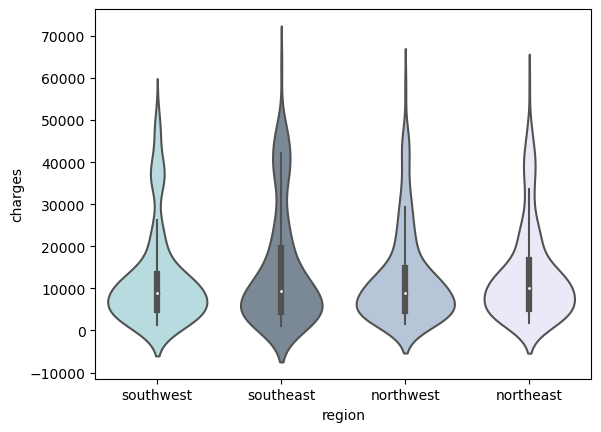

In [29]:
#distribution of charges by region
color_temp = ['powderblue', 'lightslategray', 'lightsteelblue', 'lavender']
sns.violinplot(x='region', y='charges', data=raw_df, palette=color_temp)

Examing charges by region further suggests a slight bimodality in charges distribution

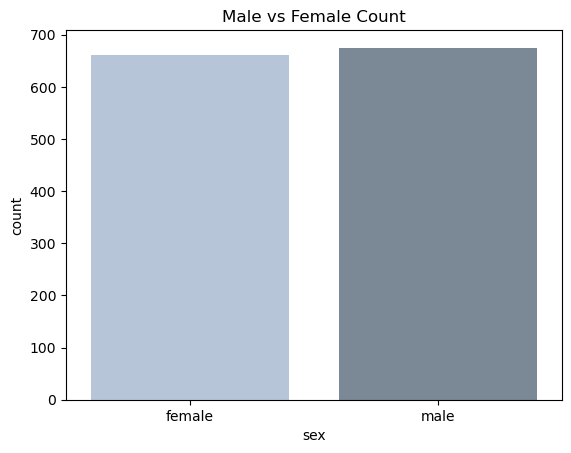

In [31]:
# sex male vs female
pal_2 = ['lightsteelblue', 'lightslategray']
sns.countplot(x='sex', data=raw_df, palette=pal_2)
plt.title('Male vs Female Count')
plt.show()

The dataset is well balanced with respect to male vs female class

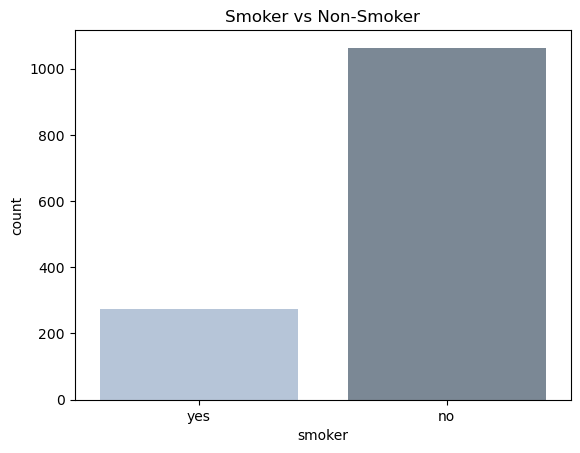

In [32]:
pal_2 = ['lightsteelblue', 'lightslategray']
sns.countplot(x='smoker', data=raw_df, palette=pal_2)
plt.title('Smoker vs Non-Smoker')
plt.show()

While smoking appears to be a great predictor of charges, the majority of individuals in this dataset are not smokers

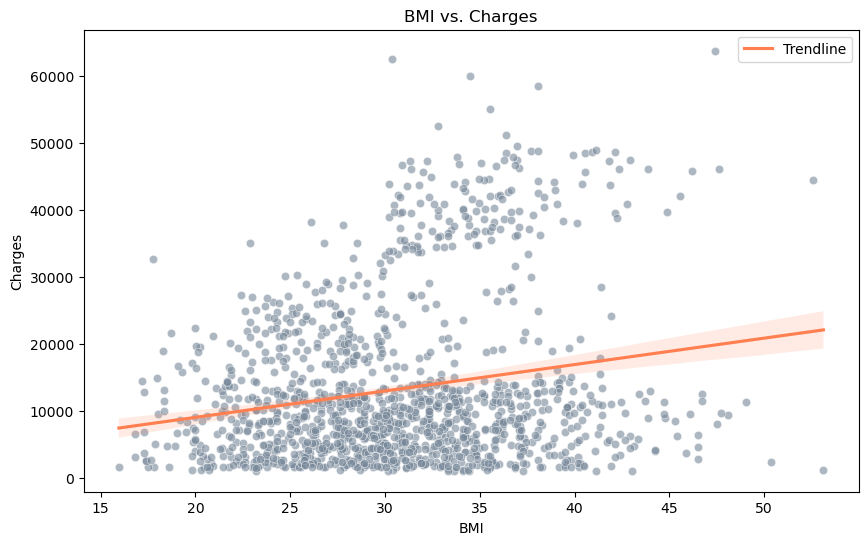

In [60]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=raw_df, x='bmi', y='charges', color='lightslategray', alpha=0.6)

sns.regplot(data=raw_df, x='bmi', y='charges', scatter=False, color='coral', label='Trendline')

plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

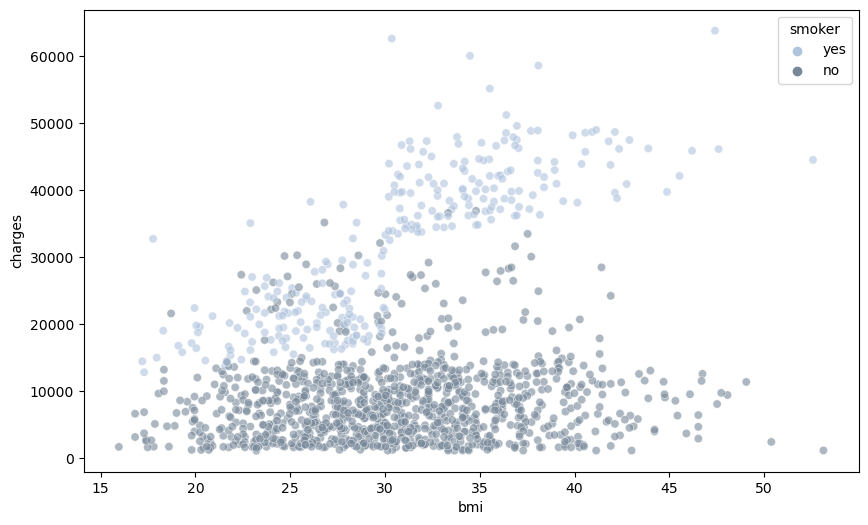

In [51]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='bmi', y='charges', hue='smoker', palette = pal_2, data=raw_df, alpha=0.6)

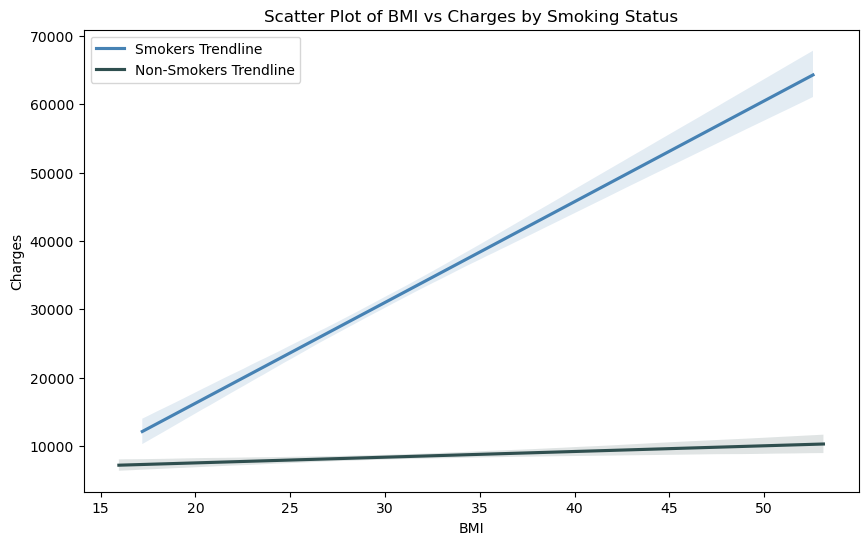

In [55]:
plt.figure(figsize=(10, 6))

sns.regplot(data=raw_df[raw_df['smoker'] == 'yes'], x='bmi', y='charges', scatter=False, color='steelblue', label='Smokers Trendline')

sns.regplot(data=raw_df[raw_df['smoker'] == 'no'], x='bmi', y='charges', scatter=False, color='darkslategray', label='Non-Smokers Trendline')

plt.title('Scatter Plot of BMI vs Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

As one can clearly see from the previous two charts, BMI is correlated with charges but if you are a smoker or not has a much greater effect on charges

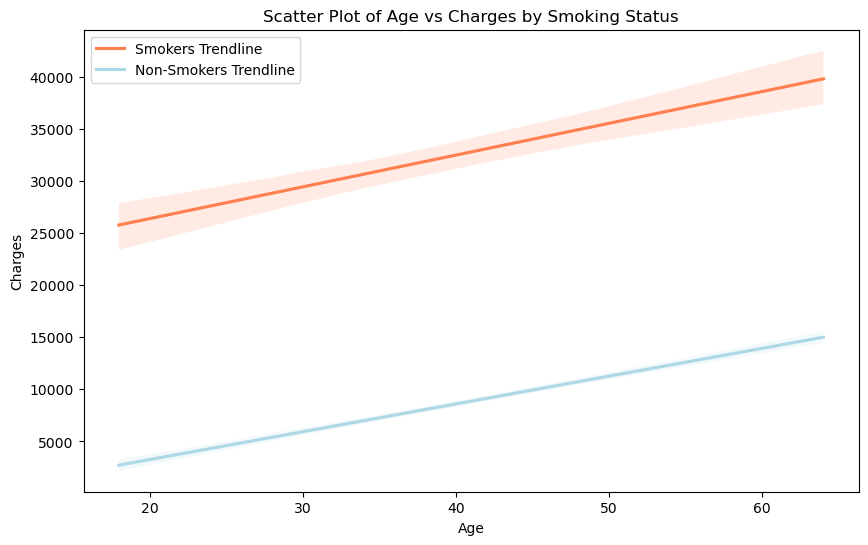

In [49]:
plt.figure(figsize=(10, 6))

sns.regplot(data=raw_df[raw_df['smoker'] == 'yes'], x='age', y='charges', scatter=False, color='coral', label='Smokers Trendline')

sns.regplot(data=raw_df[raw_df['smoker'] == 'no'], x='age', y='charges', scatter=False, color='lightblue', label='Non-Smokers Trendline')

plt.title('Scatter Plot of Age vs Charges by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

This chart is very intersting because it shows that age is also a good predictor of charges; however, if you smoke, you are at a much greater risk of having higher charges across your entire lifespan

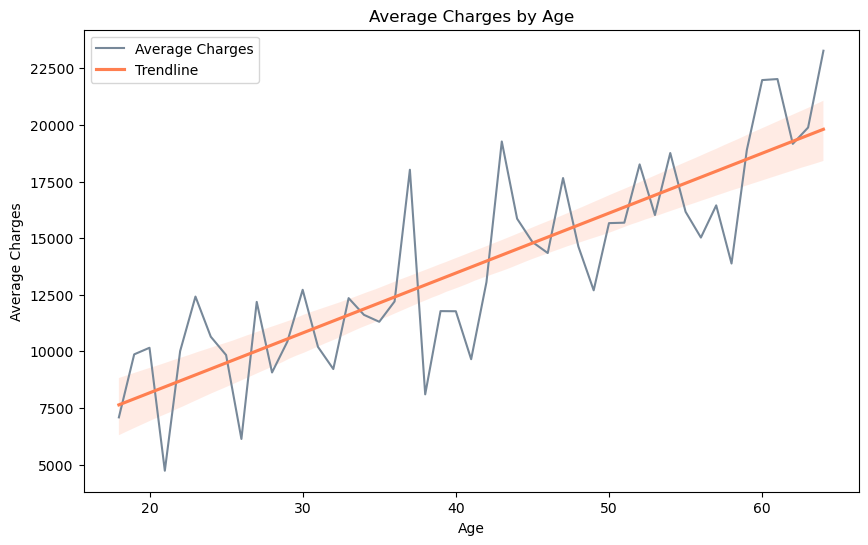

In [37]:
average_charges_by_age = raw_df.groupby('age')['charges'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=average_charges_by_age, x='age', y='charges', color='lightslategray', label='Average Charges')

sns.regplot(data=average_charges_by_age, x='age', y='charges', scatter=False, color='coral', label='Trendline')

plt.title('Average Charges by Age')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.legend()
plt.show()